# <font color = lightcoral>Agent 2: Extract Consolidated Most and Least Events Data at Inference
>    
##### <font color = red> Testing High Precision Model --> 20240712_Transformers_Non_Overlapping_run_143_of_180.pt

**20240715_flask_app_model_change_v1.00.py**

> From transformer models
>

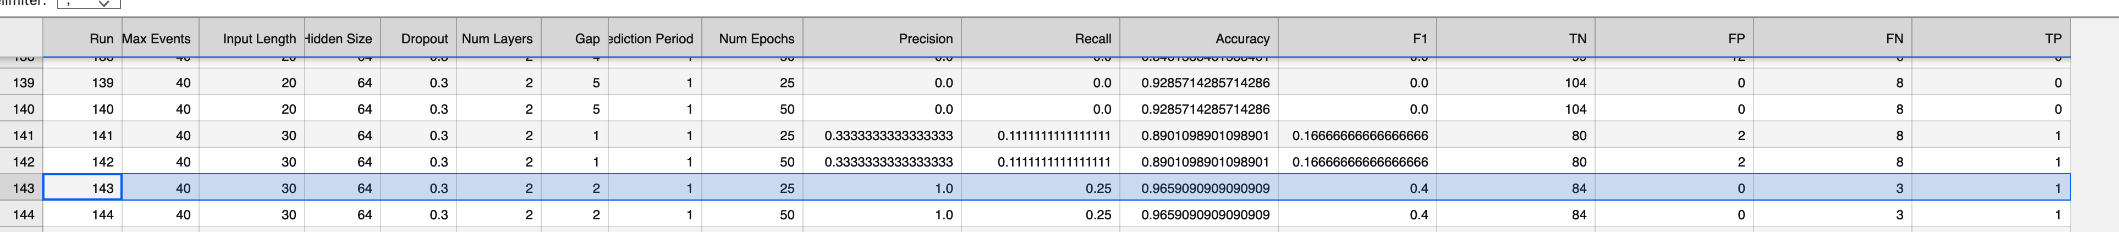

## <font color = grey> Admin

In [2]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

import warnings
warnings.simplefilter("ignore")


Base directory set to: /home/sagemaker-user


---

# <font color = lightsteelblue> 5 Key Files

In [3]:
import pandas as pd
import numpy as np
import time

data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'

# ################################## Part 1: Parsed Raw File ###################################

# print("\n" + "*"*100)
# print("********************** Part 1: Parsed Raw File ******************************************")
# print("*"*100 + "\n")

# parsed_file =  f"{data_dir}/01.BGL.log_structured.csv"
# parsed_file_df = pd.read_csv(parsed_file)
# display(parsed_file_df.head())
# print("Shape of Parsed Raw File:", parsed_file_df.shape)

######################### Part 2: Encoded File with Feature for Model Training ######################

print("\n" + "*"*100)
print("********************** Part 2: Input Data with Features ******************************************")
print("*"*100 + "\n")

encoded_feature_input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)
display(encoded_feature_input_file_df.iloc[:, :25].head())
print("Shape of Encoded File with Features:", encoded_feature_input_file_df.shape)

######################### Part 3: Orig Parquet File with 20 Event Columns (Most and Least used) Only for Mapping ######################

print("\n" + "*"*100)
print("********************** Part 3:  Orig Parquet File with 20 Event Columns (Most and Least used) Only for Mapping ******************************************")
print("*"*100 + "\n")

import pandas as pd

data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
# Load the latest file
latest_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"
latest_df = pd.read_parquet(latest_file)

# Display the head of the final dataframe
display(latest_df.head())
display(latest_df.tail())

print("Shape of File:", latest_df.shape)

# ######################### Part 4: Encoded File where Train_Test = Test HEAD ###############################

# print("\n" + "*"*100)
# print("********************** Part 4: Test Set - HEAD *******************************")
# print("*"*100 + "\n")

# encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# display(encoded_feature_input_test_df.iloc[:, :25].head(10))
# print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)


# ######################### Part 5: Encoded File where Train_Test = Test MIDDLE ###############################

# # Part 4: Encoded File where Train_Test = Test (Records 100-200)
# print("\n" + "*"*100)
# print("********************** Part 5: Test Set - Records 100-200 *******************************")
# print("*"*100 + "\n")


# encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# display(encoded_feature_input_test_df.iloc[100:110, :25])
# print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)

# ######################### Part 6: Encoded File where Train_Test = Test TAIL ###############################

# print("\n" + "*"*100)
# print("********************** Part 6: Test Set - TAIL *******************************")
# print("*"*100 + "\n")

# encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# display(encoded_feature_input_test_df.iloc[:, :25].tail(10))
# print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)


# ######################### Part 7: Event_ID to Template Mapping #######################################

# print("\n" + "*"*100)
# print("********************** Part 7: Event_ID to Template Mapping ******************************************")
# print("*"*100 + "\n")

# eventid_template_file = f"{data_dir}/04.20240711_Template_to_EventID_Mapping_v1.00.csv"
# eventid_template_df = pd.read_csv(eventid_template_file)
# display(eventid_template_df.head())
# print("Shape of Event_ID to Template Mapping:", eventid_template_df.shape)

# ######################### Part 8: Event_ID to Encoding Mapping #######################################

# print("\n" + "*"*100)
# print("********************** Part 8: Event_ID to Encoding Mapping ******************************************")
# print("*"*100 + "\n")

# eventid_encoding_file = f"{data_dir}/05.20240711_EventID_to_EncodedInteger_Mapping_v1.00.csv"
# eventid_encoding_df = pd.read_csv(eventid_encoding_file)
# display(eventid_encoding_df.head())
# print("Shape of Event_ID to Encoding Mapping:", eventid_encoding_df.shape)

# ######################### Part 9: First Two Records from X_test and y_test #######################

# print("\n" + "*"*100)
# print("********************** Part 9: First Two Records from X_test and y_test *****************************")
# print("*"*100 + "\n")

# file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# # Load the test data
# X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
# y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# # Convert the first two records to DataFrames for better display
# X_test_first_two = pd.DataFrame(X_test[:2].reshape(-1, X_test.shape[2]))
# y_test_first_two = pd.DataFrame(y_test[:2], columns=['Actual'])

# # Display the first two records
# print("First two records from X_test:")
# display(X_test_first_two)

# print("\nFirst two records from y_test:")
# display(y_test_first_two)


****************************************************************************************************
********************** Part 2: Input Data with Features ******************************************
****************************************************************************************************



,Seq_Num,Train_Test,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,EventId_1,EventId_2,EventId_3,EventId_4,EventId_5
0,0,Train,2005-06-03 16:00:00,0,0,6,228,6,0.171708,16,4,465,35431,913.0,0.012903,0,0.000000,0.171708,4895.0,18.0,228,228,228,228,228
1,1,Train,2005-06-03 16:05:00,1,0,2,987,2,0.598270,16,4,7,35433,465.0,0.285714,0,0.171708,0.426562,4257.0,19.0,729,987,987,987,987
2,2,Train,2005-06-03 16:10:00,2,0,6,399,18,0.655243,16,4,81,35431,7.0,0.222222,0,0.598270,0.056973,2756.0,23.0,734,430,504,95,95
3,3,Train,2005-06-03 16:15:00,3,0,5,328,6,1.039660,16,4,66,35431,81.0,0.090909,0,0.655243,0.384418,1532.0,25.0,987,987,987,987,328
4,4,Train,2005-06-03 16:25:00,5,0,4,399,3,0.895333,16,4,14,35433,66.0,0.214286,0,1.039660,-0.144328,633.0,28.0,95,504,504,399,399


Shape of Encoded File with Features: (14537, 35453)

****************************************************************************************************
********************** Part 3:  Orig Parquet File with 20 Event Columns (Most and Least used) Only for Mapping ******************************************
****************************************************************************************************



,Seq_Num,Train_Test,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,most_frequent_consl,least_frequent_consl,most_frequent_event_1,most_frequent_event_2,most_frequent_event_3,most_frequent_event_4,most_frequent_event_5,most_frequent_event_6,most_frequent_event_7,most_frequent_event_8,most_frequent_event_9,most_frequent_event_10,least_frequent_event_1,least_frequent_event_2,least_frequent_event_3,least_frequent_event_4,least_frequent_event_5,least_frequent_event_6,least_frequent_event_7,least_frequent_event_8,least_frequent_event_9,least_frequent_event_10
0,0,Train,2005-06-03 16:00:00,0,0,6,228,6,0.171708,16,4,465,35431,913.0,0.012903,0,0.000000,0.171708,4895.0,18.0,"228, 987, 504, 95, 399, 80","80, 399, 95, 504, 987, 228",0,228,987.0,504.0,95.0,399.0,80.0,NaN,NaN,NaN,80,399,95.0,504.0,987.0,228.0,0.0,NaN,NaN,NaN
1,1,Train,2005-06-03 16:05:00,1,0,2,987,2,0.598270,16,4,7,35433,465.0,0.285714,0,0.171708,0.426562,4257.0,19.0,"987, 729","729, 987",0,987,729.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,729,987,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Train,2005-06-03 16:10:00,2,0,6,399,18,0.655243,16,4,81,35431,7.0,0.222222,0,0.598270,0.056973,2756.0,23.0,"399, 95, 80, 734, 430, 504","504, 430, 734, 80, 95, 399",0,399,95.0,80.0,734.0,430.0,504.0,NaN,NaN,NaN,504,430,734.0,80.0,95.0,399.0,0.0,NaN,NaN,NaN
3,3,Train,2005-06-03 16:15:00,3,0,5,328,6,1.039660,16,4,66,35431,81.0,0.090909,0,0.655243,0.384418,1532.0,25.0,"328, 399, 987, 95, 80","80, 95, 987, 399, 328",0,328,399.0,987.0,95.0,80.0,NaN,NaN,NaN,NaN,80,95,987.0,399.0,328.0,0.0,NaN,NaN,NaN,NaN
4,4,Train,2005-06-03 16:25:00,5,0,4,399,3,0.895333,16,4,14,35433,66.0,0.214286,0,1.039660,-0.144328,633.0,28.0,"399, 504, 95, 80","80, 95, 504, 399",0,399,504.0,95.0,80.0,NaN,NaN,NaN,NaN,NaN,80,95,504.0,399.0,0.0,NaN,NaN,NaN,NaN,NaN


,Seq_Num,Train_Test,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,most_frequent_consl,least_frequent_consl,most_frequent_event_1,most_frequent_event_2,most_frequent_event_3,most_frequent_event_4,most_frequent_event_5,most_frequent_event_6,most_frequent_event_7,most_frequent_event_8,most_frequent_event_9,most_frequent_event_10,least_frequent_event_1,least_frequent_event_2,least_frequent_event_3,least_frequent_event_4,least_frequent_event_5,least_frequent_event_6,least_frequent_event_7,least_frequent_event_8,least_frequent_event_9,least_frequent_event_10
14532,14532,Test,2006-01-04 07:35:00,61819,0,1,606,0,0.000000,7,2,1,35433,4.0,0.0,0,0.693147,-0.693147,53.0,18.0,606,606,0,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,606,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14533,14533,Test,2006-01-04 07:40:00,61820,0,6,156,5,1.609438,7,2,10,35431,1.0,0.5,0,0.000000,1.609438,48.0,18.0,"156, 647, 812, 258, 193, 556","556, 193, 258, 812, 647, 156",0,156,647.0,812.0,258.0,193.0,556.0,NaN,NaN,NaN,556,193,258.0,812.0,647.0,156.0,0.0,NaN,NaN,NaN
14534,14534,Test,2006-01-04 07:45:00,61821,0,2,193,1,0.693147,7,2,2,35433,10.0,0.5,0,1.609438,-0.916291,49.0,19.0,"193, 556","556, 193",0,193,556.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,556,193,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14535,14535,Test,2006-01-04 07:50:00,61822,0,3,156,2,1.039721,7,2,4,35433,2.0,0.5,0,0.693147,0.346574,21.0,19.0,"156, 193, 556","556, 193, 156",0,156,193.0,556.0,NaN,NaN,NaN,NaN,NaN,NaN,556,193,156.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
14536,14536,Test,2006-01-04 08:00:00,61824,1,1,99,0,0.000000,8,2,8,35433,4.0,0.0,0,1.039721,-1.039721,25.0,18.0,99,99,0,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Shape of File: (14537, 42)


---

# <font color = grey> Run Flask App
### <font color = tomato> Worked after adding flask route for /

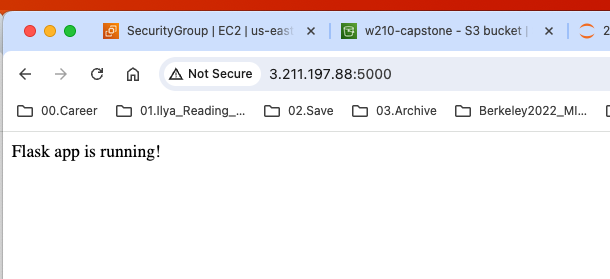

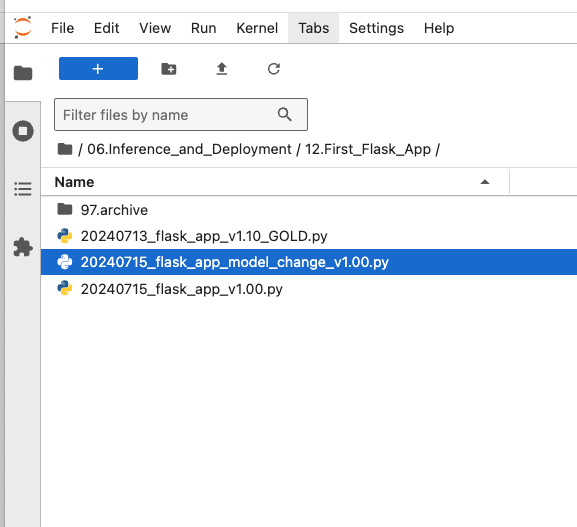

___
# <font color = red> Agent 1 Inference: Primary --> DONE
## <font color = teal> Simplify the role of Agent 1 (to track just the results)
#### <font color = grey> Agent 1: results only. Agent 2: additional event info

X_test shape: (127, 20, 56)
y_test shape: (127,)
Calculated start seq_num: 11624
Max end seq_num: 14536
Expected end seq_num based on user input: 15913
Number of test runs exceeds the maximum allowed (88). Setting num_tests to 88.
Start seq_num for X_test: 0
End seq_num for X_test: 88
X_test_limited shape: (88, 20, 56)
X_test_limited sample: [[[ 4.55100000e+04 -3.64159959e-01  1.10000000e+01 ... -6.03386704e+01
   -7.63430651e+01  2.76562845e+01]
  [ 4.55140000e+04  1.04469389e-01  8.00000000e+01 ... -1.03639051e+02
   -1.36116477e+02  1.60575016e+01]
  [ 4.55190000e+04 -3.64159959e-01  4.10000000e+01 ... -6.49000767e+01
   -1.05809419e+02 -6.46902538e+01]
  ...
  [ 4.55720000e+04  4.16888954e-01  8.00000000e+01 ... -3.95672762e+01
   -1.02867421e+02 -1.92895632e+02]
  [ 4.55780000e+04 -3.64159959e-01  1.68000000e+02 ... -3.82875507e+01
   -4.59029017e+01  3.35630721e+01]
  [ 4.55800000e+04 -3.64159959e-01  5.00000000e+01 ... -3.82875507e+01
   -4.59029017e+01  3.35630721e+01]]]
Respon

,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,time_start
0,11624,11656,11624,11653,11654,11655,11655,11656,0,0.0,2005-11-08 18:50:00
1,11657,11689,11657,11686,11687,11688,11688,11689,0,0.0,2005-11-09 10:45:00
2,11690,11722,11690,11719,11720,11721,11721,11722,0,0.0,2005-11-10 04:05:00
3,11723,11755,11723,11752,11753,11754,11754,11755,0,0.0,2005-11-10 15:20:00
4,11756,11788,11756,11785,11786,11787,11787,11788,0,0.0,2005-11-11 05:05:00
5,11789,11821,11789,11818,11819,11820,11820,11821,0,0.0,2005-11-11 15:55:00
6,11822,11854,11822,11851,11852,11853,11853,11854,0,0.0,2005-11-12 14:45:00
7,11855,11887,11855,11884,11885,11886,11886,11887,0,0.0,2005-11-14 05:15:00
8,11888,11920,11888,11917,11918,11919,11919,11920,0,0.0,2005-11-14 15:50:00
9,11921,11953,11921,11950,11951,11952,11952,11953,0,0.0,2005-11-14 23:30:00


Final file with consolidated columns saved to: /home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files/03B.20240716175747_agent1_non_overlap_model2_consl.csv

Metrics:
                Metric      Value
0             Accuracy   0.909091
1  Precision (Class 1)   0.500000
2     Recall (Class 1)   0.375000
3             F1 Score   0.428571
4       True Positives   3.000000
5      False Positives   3.000000
6       True Negatives  77.000000
7      False Negatives   5.000000


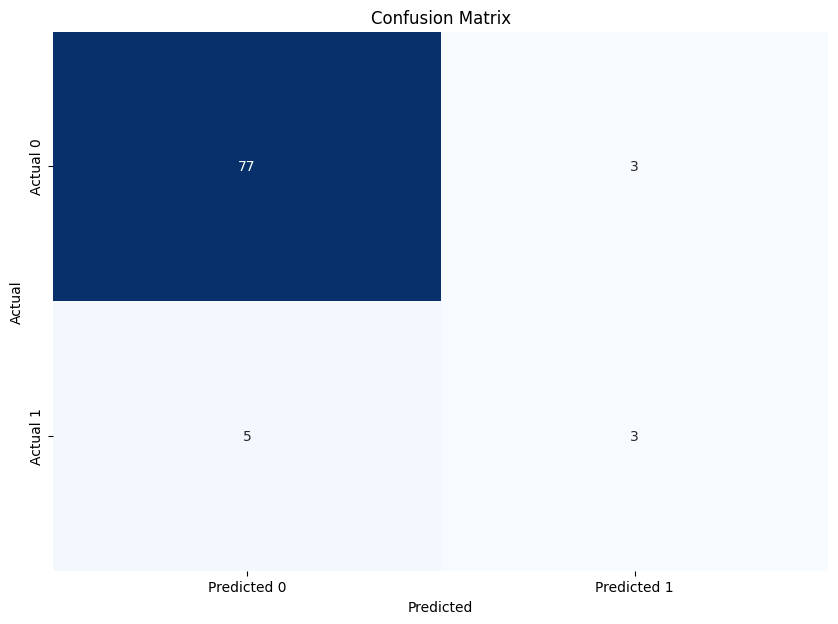

In [4]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from datetime import datetime

# Parameters
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
save_dir = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files'
file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# Load the test data
X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Define start time and number of test runs
start_time = '2005-11-08 18:50:00' #seq 11624
num_tests = 130

# Load the original parquet file with sequence mapping
input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
original_df = pd.read_parquet(input_file)

# Ensure Seq_Num is integer for proper merging
original_df['Seq_Num'] = original_df['Seq_Num'].astype(int)

# Filter the test dataset based on the specified start time
start_seq_num = original_df[(original_df['Train_Test'] == 'Test') & (original_df['time_start'] == start_time)]['Seq_Num'].values[0]
print(f"Calculated start seq_num: {start_seq_num}")

# Define the number of records for each test run (20 source + 2 gap + 1 prediction period = 23 records)
num_records_per_test = 33

# Calculate the maximum end seq_num based on the dataset
max_end_seq_num = original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].max()
print(f"Max end seq_num: {max_end_seq_num}")

# Calculate expected end seq_num based on user input
expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1
print(f"Expected end seq_num based on user input: {expected_end_seq_num}")

# Check if the user-specified number of runs exceeds the maximum allowed runs
if expected_end_seq_num > max_end_seq_num:
    max_allowed_runs = (max_end_seq_num - start_seq_num + 1) // num_records_per_test
    print(f"Number of test runs exceeds the maximum allowed ({max_allowed_runs}). Setting num_tests to {max_allowed_runs}.")
    num_tests = max_allowed_runs
    expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

# Calculate the correct start and end sequence numbers for X_test and y_test
start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
end_index_x_test = start_index_x_test + num_tests

# Ensure the end sequence number does not exceed the length of the test data
if end_index_x_test > len(X_test):
    end_index_x_test = len(X_test)

# Print the sequence numbers for debugging
print(f"Start seq_num for X_test: {start_index_x_test}")
print(f"End seq_num for X_test: {end_index_x_test}")

# Prepare the data for the specified number of test runs
X_test_limited = X_test[start_index_x_test:end_index_x_test]
y_test_limited = y_test[start_index_x_test:end_index_x_test]

# Print the shape and sample of the limited test data for debugging
print(f"X_test_limited shape: {X_test_limited.shape}")
print(f"X_test_limited sample: {X_test_limited[:1]}")

# Prepare the data for the request
data = {'X_test': X_test_limited.tolist()}

# Send a request to the server
response = requests.post('http://0.0.0.0:5000/predict', json=data)
response_data = response.json()

# Verify the response keys
print("Response keys:", response_data.keys())

# Process the response
predictions = np.array(response_data['predictions']).flatten()

# Print first 10 predictions and actual labels
print("First 10 predictions:", predictions[:10])
print("First 10 actual labels:", y_test_limited[:10])

# Create DataFrame for tracking and merging with additional information
tracking_data = []

for i in range(num_tests):
    total_seq_start = start_seq_num + i * num_records_per_test
    total_seq_end = total_seq_start + num_records_per_test - 1
    source_seq_start = total_seq_start
    source_seq_end = source_seq_start + 30 - 1
    gap_seq_start = source_seq_end + 1
    gap_seq_end = gap_seq_start + 1
    prediction_seq_start = total_seq_end - 1
    prediction_seq_end = total_seq_end
    
    tracking_data.append([
        total_seq_start, total_seq_end, source_seq_start, source_seq_end,
        gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end,
        predictions[i],  # Corrected to take the i-th prediction
        y_test_limited[i],  # Corresponding actual label
        original_df[original_df['Seq_Num'] == source_seq_start]['time_start'].values[0]  # Corresponding time_start
    ])

tracking_df = pd.DataFrame(tracking_data, columns=[
    "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
    "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
    "Predicted", "Actual", "time_start"
])

# Display the first 30 columns of the new DataFrame
pd.set_option('display.max_columns', 50)
print("\nEnhanced Results:")
display(tracking_df)

# Define the timestamp
timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

# Save the consolidated DataFrame to the specified location
final_file = f"{save_dir}/03B.{timestamp}_agent1_non_overlap_model2_consl.csv"
tracking_df.to_csv(final_file, index=False)

print(f"Final file with consolidated columns saved to: {final_file}")

# Calculate metrics
conf_matrix = confusion_matrix(y_test_limited, predictions, labels=[0, 1])
precision = precision_score(y_test_limited, predictions, zero_division=0)
recall = recall_score(y_test_limited, predictions, zero_division=0)
accuracy = accuracy_score(y_test_limited, predictions)
f1 = f1_score(y_test_limited, predictions, zero_division=0)

# Check if the confusion matrix has the expected shape
if conf_matrix.size == 4:
    tn, fp, fn, tp = conf_matrix.ravel()
else:
    # Handle cases with fewer than two classes in the confusion matrix
    tn = conf_matrix[0, 0] if conf_matrix.shape[0] > 0 else 0
    fp = conf_matrix[0, 1] if conf_matrix.shape[1] > 1 else 0
    fn = conf_matrix[1, 0] if conf_matrix.shape[0] > 1 else 0
    tp = conf_matrix[1, 1] if conf_matrix.shape[1] > 1 else 0

# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'],
    'Value': [accuracy, precision, recall, f1, tp, fp, tn, fn]
})

# Print metrics DataFrame
print("\nMetrics:")
print(metrics_df)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

___
# <font color = red> Agent 2 Inference: SECONDARY --> DONE
## Use Mapping Info to explain the events used in the inference

### <font color = grey> This agent will then work with Agent 1 who specilizes in initial inference

In [5]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from datetime import datetime

# Parameters
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
save_dir = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files'
file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# Load the test data
X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Define start time and number of test runs
start_time = '2005-11-08 18:50:00'  # seq 11624
num_tests = 130

# Load the original parquet file with sequence mapping
input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
original_df = pd.read_parquet(input_file)

# Ensure Seq_Num is integer for proper merging
original_df['Seq_Num'] = original_df['Seq_Num'].astype(int)

# Filter the test dataset based on the specified start time
start_seq_num = original_df[(original_df['Train_Test'] == 'Test') & (original_df['time_start'] == start_time)]['Seq_Num'].values[0]
print(f"Calculated start seq_num: {start_seq_num}")

# Define the number of records for each test run (20 source + 2 gap + 1 prediction period = 23 records)
num_records_per_test = 33

# Calculate the maximum end seq_num based on the dataset
max_end_seq_num = original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].max()
print(f"Max end seq_num: {max_end_seq_num}")

# Calculate expected end seq_num based on user input
expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1
print(f"Expected end seq_num based on user input: {expected_end_seq_num}")

# Check if the user-specified number of runs exceeds the maximum allowed runs
if expected_end_seq_num > max_end_seq_num:
    max_allowed_runs = (max_end_seq_num - start_seq_num + 1) // num_records_per_test
    print(f"Number of test runs exceeds the maximum allowed ({max_allowed_runs}). Setting num_tests to {max_allowed_runs}.")
    num_tests = max_allowed_runs
    expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

# Calculate the correct start and end sequence numbers for X_test and y_test
start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
end_index_x_test = start_index_x_test + num_tests

# Ensure the end sequence number does not exceed the length of the test data
if end_index_x_test > len(X_test):
    end_index_x_test = len(X_test)

# Print the sequence numbers for debugging
print(f"Start seq_num for X_test: {start_index_x_test}")
print(f"End seq_num for X_test: {end_index_x_test}")

# Prepare the data for the specified number of test runs
X_test_limited = X_test[start_index_x_test:end_index_x_test]
y_test_limited = y_test[start_index_x_test:end_index_x_test]

# Print the shape and sample of the limited test data for debugging
print(f"X_test_limited shape: {X_test_limited.shape}")
print(f"X_test_limited sample: {X_test_limited[:1]}")

# Prepare the data for the request
data = {'X_test': X_test_limited.tolist()}

# Send a request to the server
response = requests.post('http://0.0.0.0:5000/predict', json=data)
response_data = response.json()

# Verify the response keys
print("Response keys:", response_data.keys())

# Process the response
predictions = np.array(response_data['predictions']).flatten()

# Print first 10 predictions and actual labels
print("First 10 predictions:", predictions[:10])
print("First 10 actual labels:", y_test_limited[:10])

# Create DataFrame for tracking and merging with additional information
tracking_data = []

for i in range(num_tests):
    total_seq_start = start_seq_num + i * num_records_per_test
    total_seq_end = total_seq_start + num_records_per_test - 1
    source_seq_start = total_seq_start
    source_seq_end = source_seq_start + 30 - 1
    gap_seq_start = source_seq_end + 1
    gap_seq_end = gap_seq_start + 1
    prediction_seq_start = total_seq_end - 1
    prediction_seq_end = total_seq_end
    
    tracking_data.append([
        total_seq_start, total_seq_end, source_seq_start, source_seq_end,
        gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end,
        predictions[i],  # Corrected to take the i-th prediction
        y_test_limited[i]  # Corresponding actual label
    ])

tracking_df = pd.DataFrame(tracking_data, columns=[
    "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
    "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
    "Predicted", "Actual"
])

# Convert Source_Seq_Start to integer for proper merging
tracking_df['Source_Seq_Start'] = tracking_df['Source_Seq_Start'].astype(int)

# Load the master tracking file
master_tracking_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"
master_tracking_df = pd.read_parquet(master_tracking_file)

# Merge with original data to get necessary columns
merged_df = tracking_df.merge(master_tracking_df, left_on='Source_Seq_Start', right_on='Seq_Num', how='left')

# Retain only necessary columns
columns_to_keep = [
    "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
    "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
    "Predicted", "Actual", "Seq_Num", "Train_Test", "time_start", "time_start_int",
    "Class", "unique_events", "most_frequent_event", "transitions", "entropy",
    "hour_of_day", "day_of_week", "event_count", "top_event_frequency",
    "prev_event_count", "transition_rate", "high_transition_rate", "prev_entropy",
    "entropy_change", "rolling_event_count", "rolling_unique_event_count"
]

filtered_df = merged_df[columns_to_keep]

# Consolidate the most frequent and least frequent events
def consolidate_events(df, start_col, end_col, col_name):
    consolidated = []
    for i, row in df.iterrows():
        seen_events = set()
        events = []
        for seq_num in range(row[start_col], row[end_col] + 1):
            event_list = master_tracking_df[master_tracking_df['Seq_Num'] == seq_num][col_name].tolist()
            for event in event_list:
                for e in event.split(', '):
                    if e not in seen_events:
                        seen_events.add(e)
                        events.append(e)
        consolidated.append(', '.join(events))
    return consolidated

filtered_df['runtime_most_frequent_consl'] = consolidate_events(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_consl')
filtered_df['runtime_least_frequent_consl'] = consolidate_events(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'least_frequent_consl')

# Display the head and tail of the final dataframe
display(filtered_df.head())
display(filtered_df.tail())

# Define the timestamp
timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

# Save the consolidated DataFrame to the specified location
final_file = f"{save_dir}/03B.{timestamp}_agent2_non_overlap_model2_consl.csv"
filtered_df.to_csv(final_file, index=False)

print(f"Final file with consolidated columns saved to: {final_file}")

X_test shape: (127, 20, 56)
y_test shape: (127,)
Calculated start seq_num: 11624
Max end seq_num: 14536
Expected end seq_num based on user input: 15913
Number of test runs exceeds the maximum allowed (88). Setting num_tests to 88.
Start seq_num for X_test: 0
End seq_num for X_test: 88
X_test_limited shape: (88, 20, 56)
X_test_limited sample: [[[ 4.55100000e+04 -3.64159959e-01  1.10000000e+01 ... -6.03386704e+01
   -7.63430651e+01  2.76562845e+01]
  [ 4.55140000e+04  1.04469389e-01  8.00000000e+01 ... -1.03639051e+02
   -1.36116477e+02  1.60575016e+01]
  [ 4.55190000e+04 -3.64159959e-01  4.10000000e+01 ... -6.49000767e+01
   -1.05809419e+02 -6.46902538e+01]
  ...
  [ 4.55720000e+04  4.16888954e-01  8.00000000e+01 ... -3.95672762e+01
   -1.02867421e+02 -1.92895632e+02]
  [ 4.55780000e+04 -3.64159959e-01  1.68000000e+02 ... -3.82875507e+01
   -4.59029017e+01  3.35630721e+01]
  [ 4.55800000e+04 -3.64159959e-01  5.00000000e+01 ... -3.82875507e+01
   -4.59029017e+01  3.35630721e+01]]]
Respon

,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Seq_Num,Train_Test,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl,runtime_least_frequent_consl
0,11624,11656,11624,11653,11654,11655,11655,11656,0,0.0,11624,Test,2005-11-08 18:50:00,45538,0,2,68,1,0.500402,18,1,10,35433,1.0,0.100000,0,0.000000,0.500402,17.0,13.0,"68, 504, 399, 763, 776, 95, 80, 176, 606, 976, 231, 800, 69, 10, 831, 595, 205, 212, 959, 39, 142, 738, 917","504, 68, 80, 95, 776, 763, 399, 176, 606, 976, 231, 138, 701, 19, 364, 424, 627, 460, 652, 133, 809, 142, 738, 917"
1,11657,11689,11657,11686,11687,11688,11688,11689,0,0.0,11657,Test,2005-11-09 10:45:00,45729,0,1,142,0,0.000000,10,2,7,35433,1.0,0.000000,0,0.000000,0.000000,126.0,19.0,"142, 176, 763, 976, 231, 141, 399, 95, 80, 504, 738, 68, 108, 104, 776, 917","142, 176, 763, 976, 231, 141, 80, 95, 399, 738, 504, 68, 104, 108, 776, 917"
2,11690,11722,11690,11719,11720,11721,11721,11722,0,0.0,11690,Test,2005-11-10 04:05:00,45937,0,7,399,258,0.664156,4,3,1069,35387,2.0,0.241347,0,0.000000,0.664156,2309.0,24.0,"399, 95, 80, 776, 763, 504, 917, 976, 201, 246, 913, 68, 231","917, 504, 763, 776, 80, 95, 399, 976, 201, 913, 246, 68, 231"
3,11723,11755,11723,11752,11753,11754,11754,11755,0,0.0,11723,Test,2005-11-10 15:20:00,46072,0,5,95,7,1.581094,15,3,9,35432,12.0,0.777778,1,1.545423,0.035671,53.0,27.0,"95, 763, 399, 80, 776, 10, 976, 831, 127, 705, 401, 176, 68, 74, 248, 738, 231, 142, 108, 104, 504, 917","776, 80, 399, 763, 95, 138, 220, 319, 385, 128, 657, 622, 935, 997, 55, 176, 401, 68, 248, 74, 976, 231, 738, 142, 19, 888, 972, 683, 736, 994, 116, 809, 11, 104, 108, 917, 504"
4,11756,11788,11756,11785,11786,11787,11787,11788,0,0.0,11756,Test,2005-11-11 05:05:00,46237,0,3,399,10,0.746694,5,4,35,35433,16.0,0.285714,0,0.822265,-0.075571,649.0,21.0,"399, 95, 80, 976, 201, 763, 776, 504, 917, 68, 235, 583, 912, 162, 10, 831, 127, 705, 205, 212, 959, 90, 125","80, 95, 399, 976, 504, 776, 763, 201, 917, 68, 235, 583, 162, 912, 33, 69, 111, 548, 559, 410, 696, 51, 636, 39, 125, 90"


,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Seq_Num,Train_Test,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl,runtime_least_frequent_consl
83,14363,14395,14363,14392,14393,14394,14394,14395,1,1.0,14363,Test,2005-12-28 04:05:00,59761,0,2,976,1,0.693147,4,2,2,35433,3.0,0.500000,0,1.098612,-0.405465,108.0,20.0,"976, 236, 68, 193, 556, 561, 114, 272, 532, 389, 837, 615, 10, 45, 647, 156, 328, 812, 258, 625, 606, 176","236, 976, 556, 193, 68, 138, 626, 864, 710, 540, 374, 586, 221, 258, 479, 497, 154, 28, 156, 328, 625, 812, 647, 606, 176, 561"
84,14396,14428,14396,14425,14426,14427,14427,14428,0,0.0,14396,Test,2005-12-29 10:45:00,60129,0,1,228,0,0.000000,10,3,1,35433,1.0,0.000000,0,0.000000,0.000000,128.0,16.0,"228, 193, 556, 156, 647, 812, 258, 625, 606, 241, 101, 332, 671, 716, 898, 5, 641, 617, 681, 571, 403, 236, 561, 974, 68","228, 556, 193, 258, 812, 647, 156, 625, 606, 671, 332, 101, 241, 716, 898, 5, 571, 681, 617, 641, 403, 236, 974, 561, 68"
85,14429,14461,14429,14458,14459,14460,14460,14461,0,0.0,14429,Test,2005-12-31 11:50:00,60718,0,5,193,75,1.260599,11,5,85,35430,1.0,0.882353,1,0.000000,1.260599,190.0,20.0,"193, 556, 647, 156, 812, 258, 976, 236, 606, 228, 328, 68","812, 156, 647, 556, 193, 258, 236, 976, 606, 228, 328, 68"
86,14462,14494,14462,14491,14492,14493,14493,14494,0,0.0,14462,Test,2006-01-02 17:00:00,61356,0,4,193,7,1.310784,17,0,9,35433,112.0,0.777778,1,1.560124,-0.249340,148.0,25.0,"193, 556, 156, 68, 647, 812, 661, 228, 258, 976, 236, 532, 800, 389, 10, 831, 678, 837, 127, 705, 561, 615, 272, 207, 864, 45, 437, 271","68, 156, 556, 193, 812, 647, 661, 228, 258, 236, 976, 710, 540, 374, 586, 221, 452, 526, 409, 751, 478, 138, 114, 271, 437, 45, 864, 837, 207, 272, 615"
87,14495,14527,14495,14524,14525,14526,14526,14527,0,0.0,14495,Test,2006-01-03 11:15:00,61575,0,3,193,12,1.004242,11,1,14,35433,15.0,0.857143,1,0.891867,0.112375,75.0,22.0,"193, 556, 647, 561, 176, 812, 107, 976, 236, 156, 97, 68, 228","647, 556, 193, 176, 561, 812, 107, 236, 976, 156, 97, 68, 228"


Final file with consolidated columns saved to: /home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files/03B.20240716175757_agent2_non_overlap_model2_consl.csv
